In [102]:
#correct things are imported
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import pchip_interpolate

from genetic_algorithm_pfm.genetic_algorithm_pfm.algorithm import GeneticAlgorithm

In [103]:
# x1 = area in m2
# x2 = distance from shore

c1 = 25   # Costs per material m3
c2 = 4  # Cost of fuel use per L
c3 = 0.1   # Emission of materials per m3
c4 = 1.2   # Emission of fuel per L
c5 = 150000 # Capacity per m2 in kW / m2
c6 = 1/10000 # Scaling factor feasible distance
c7 = 200 #cost of small cable per m
c8 = 400 #cost of large cable per m
c9 = 3 #amount of farms connected
c10 = 1 #still has to be defined

k1 = 1.7   # Height of island
k2 = 1.9   # Ship size
k3 = 0.0009   # fuel use per m

constants_list = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, k1, k2, k3]

def F1(x1, x2, constants_list=constants_list): #this function calculates the total material use in m3
    F1_completed = x1 * constants_list[10]
    return F1_completed

def F2(x1, x2, constants_list=constants_list): #this function calculates the total fuel use in L
    F1_run = F1(x1, x2, constants_list)
    F2_completed = constants_list[12] * ((F1_run / constants_list[11]) *x2)
    return F2_completed

def F3(x1, x2, constants_list=constants_list): #this function calculates the total power output in kW
    F3_run = (c8 * x2)
    return F3_run

In [104]:
def O1(x1, x2, constants_list=constants_list):
    """Raw cost objective (€). Works with scalars or arrays."""
    F1_ran = F1(x1, x2, constants_list)
    F2_ran = F2(x1, x2, constants_list)
    F3_ran = F3(x1, x2, constants_list)
    return F1_ran * c1 + F2_ran * c2 + F3_ran

def objective_p1(x1, x2, constants_list=constants_list):
    O1_val = O1(x1, x2, constants_list)
    p = pchip_interpolate([500, 500000, 5000000], [100, 20, 0], O1_val)
    return np.clip(p, 0, 100)

In [105]:
def O2(x1, x2, constants_list=constants_list):
    """Raw emissions objective (kg CO2)."""
    F1_ran = F1(x1, x2, constants_list)
    F2_ran = F2(x1, x2, constants_list)
    return F1_ran * c3 + F2_ran * c4

def objective_p2(x1, x2, constants_list=constants_list):
    O2_val = O2(x1, x2, constants_list)
    p = pchip_interpolate([50, 4000, 10000], [100, 80, 0], O2_val)
    return np.clip(p, 0, 100)

In [106]:
def O3(x1, x2, constants_list=constants_list):
    """Raw capacity objective (kW)."""
    return x1 * c5 * (-np.exp(-c6 * x2) + 1)

def objective_p3(x1, x2, constants_list=constants_list):
    O3_val = O3(x1, x2, constants_list)
    p = pchip_interpolate([0, 150000000, 10000000000, 15000000000], [0, 0, 100, 100], O3_val)
    return np.clip(p, 0, 100)

In [107]:

def O4(x1, x2, constants_list=constants_list):
    """Raw ecosystem / nature metric (unitless in [0,1])."""
    return 0.5 * (np.tanh(x2 - 45000) + 1)

def objective_p4(x1, x2, constants_list=constants_list):
    O4_val = O4(x1, x2, constants_list)
    p = pchip_interpolate([0, 0.5, 1], [0, 50, 100], O4_val)
    return np.clip(p, 0, 100)


In [108]:
def objective(variables):
    """
    Objective function that is fed to the GA. Calles the separate preference functions that are declared above.

    :param variables: array with design variable values per member of the population. Can be split by using array
    slicing
    :return: 1D-array with aggregated preference scores for the members of the population.
    """
    # extract 1D design variable arrays from full 'variables' array
    x1 = variables[:, 0]
    x2 = variables[:, 1]

    # calculate the preference scores
    p_1 = objective_p1(x1, x2, constants_list = constants_list)
    p_2 = objective_p2(x1, x2, constants_list = constants_list)
    p_3 = objective_p3(x1, x2, constants_list = constants_list)
    p_4 = objective_p3(x1, x2, constants_list = constants_list)

    # aggregate preference scores and return this to the GA
    return [0.25, 0.25, 0.25, 0.25], [p_1, p_2, p_3, p_4]

In [109]:
#fuctions for constraints
cons = []

b1 = [0, 1000000]  # x1 bounds
b2 = [0, 100000]  # x2 bounds
bounds = [b1, b2]

In [110]:
# O1_array = np.linspace(0, 5000000, 10000)
# O2_array = np.linspace(0, 10000, 10000)
# O3_array = np.linspace(0, 15000000000, 10000)
# O4_array = np.linspace(0, 1, 10000)

# p1 = pchip_interpolate([500, 500000, 5000000], [100, 20, 0], O1_array)
# p2 = pchip_interpolate([50, 4000, 10000], [100, 80, 0], O2_array)
# p3 = pchip_interpolate([0, 150000000, 10000000000 , 15000000000], [0, 0, 100 ,100], O3_array)
# p4 = pchip_interpolate([0, 0.5, 1], [0, 50 ,100], O4_array)


Run GA with minmax
The type of aggregation is set to minmax
Generation   Best score   Mean             Max stall    Diversity    Number of non-feasible results
0            24.8589      24.9994          0            0.007        0           
1            24.2423      24.9354          0            0.145        0           
2            24.2423      24.5284          1            0.348        0           
3            24.2423      24.3334          2            0.464        0           
4            24.2423      24.3726          3            0.45         0           
5            24.2423      24.3484          4            0.458        0           
6            24.2423      24.3354          5            0.464        0           
7            24.2423      24.3401          6            0.46         0           
8            24.2423      24.333           7            0.459        0           
9            24.2423      24.3408          8            0.463        0           
Stopped at gen 9
Exe

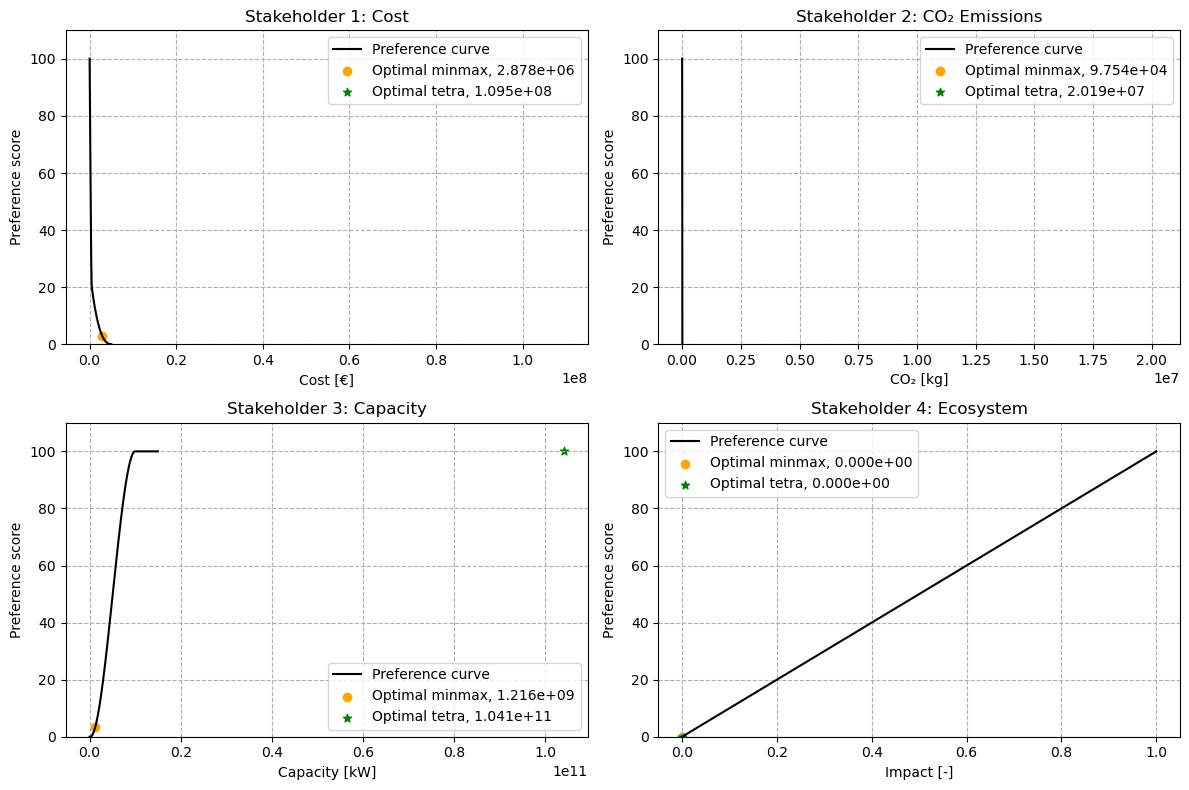

In [111]:
# two ways of optimising results
paradigm = ['minmax', 'tetra']
marker = ['o', '*']
colours = ['orange', 'green']


fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i in range(2):
    # make dictionary with parameter settings for the GA run with the IMAP solver
    options = {
        'n_bits': 8,
        'n_iter': 400,
        'n_pop': 500,
        'r_cross': 0.8,
        'max_stall': 8,
        'aggregation': paradigm[i],  # minmax or tetra
        'var_type': 'real'
    }

    # run the GA and print its result
    print(f'Run GA with {paradigm[i]}')
    ga = GeneticAlgorithm(objective=objective, constraints=cons, bounds=bounds, options=options)
    score_IMAP, design_variables_IMAP, _ = ga.run()

    print(f'Optimal result for x1 = {round(design_variables_IMAP[0], 2)} size '
          f'and x2 = {round(design_variables_IMAP[1], 2)} distance')

    x1_model = design_variables_IMAP[0]
    x2_model = design_variables_IMAP[1]

    # Compute the four objective values
    o1_model = O1(x1_model, x2_model, constants_list)
    o2_model = O2(x1_model, x2_model, constants_list)
    o3_model = O3(x1_model, x2_model, constants_list)
    o4_model = O4(x1_model, x2_model, constants_list)

    # Get preference scores for these objective values
    p1_model = pchip_interpolate([500, 500000, 5000000], [100, 20, 0], o1_model)
    p2_model = pchip_interpolate([50, 4000, 10000], [100, 80, 0], o2_model)
    p3_model = pchip_interpolate([0, 150000000, 10000000000, 15000000000], [0, 0, 100, 100], o3_model)
    p4_model = pchip_interpolate([0, 0.5, 1], [0, 50, 100], o4_model)

    # Plot preference curves (only once)
    if i == 0:
        O1_array = np.linspace(0, 5000000, 10000)
        O2_array = np.linspace(0, 10000, 10000)
        O3_array = np.linspace(0, 15000000000, 10000)
        O4_array = np.linspace(0, 1, 10000)

        p1 = pchip_interpolate([500, 500000, 5000000], [100, 20, 0], O1_array)
        p2 = pchip_interpolate([50, 4000, 10000], [100, 80, 0], O2_array)
        p3 = pchip_interpolate([0, 150000000, 10000000000, 15000000000], [0, 0, 100, 100], O3_array)
        p4 = pchip_interpolate([0, 0.5, 1], [0, 50, 100], O4_array)

        axs[0].plot(O1_array, p1, color='black', label='Preference curve')
        axs[1].plot(O2_array, p2, color='black', label='Preference curve')
        axs[2].plot(O3_array, p3, color='black', label='Preference curve')
        axs[3].plot(O4_array, p4, color='black', label='Preference curve')

        axs[0].set(title='Stakeholder 1: Cost', xlabel='Cost [€]', ylabel='Preference score')
        axs[1].set(title='Stakeholder 2: CO₂ Emissions', xlabel='CO₂ [kg]', ylabel='Preference score')
        axs[2].set(title='Stakeholder 3: Capacity', xlabel='Capacity [kW]', ylabel='Preference score')
        axs[3].set(title='Stakeholder 4: Ecosystem', xlabel='Impact [-]', ylabel='Preference score')

        for ax in axs:
            ax.grid(linestyle='--')
            ax.set_ylim(0, 110)

    objectives_model = [o1_model, o2_model, o3_model, o4_model]
    # Scatter results for this paradigm
    axs[0].scatter(o1_model, p1_model, label=f'Optimal {paradigm[i]}, {objectives_model[0]:.3e}', color=colours[i], marker=marker[i])
    axs[1].scatter(o2_model, p2_model, label=f'Optimal {paradigm[i]}, {objectives_model[1]:.3e}', color=colours[i], marker=marker[i])
    axs[2].scatter(o3_model, p3_model, label=f'Optimal {paradigm[i]}, {objectives_model[2]:.3e}', color=colours[i], marker=marker[i])
    axs[3].scatter(o4_model, p4_model, label=f'Optimal {paradigm[i]}, {objectives_model[3]:.3e}', color=colours[i], marker=marker[i])


# Add legends
for ax in axs:
    ax.legend()

fig.tight_layout()
plt.show()
